# First Autoencoder  

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

## Data 생성
- 3 차원 data 생성

In [2]:
m = 100
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
data = np.empty((m, 3))
data[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.randn(m)/2
data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
data[:,2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(m)
data.shape

(100, 3)

- 3차원 data 시각화

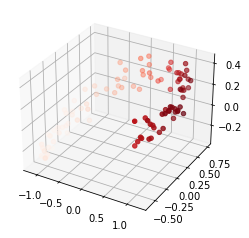

In [3]:
X_train = data   

# preview the data
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:, 0], X_train[:, 1], 
             X_train[:, 2], c=X_train[:, 0], cmap='Reds');

## Autoencoder model 작성

- 3 차원 data 를 2 차원으로 차원 축소

In [4]:
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=(3,))])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=(2,))])

autoencoder = keras.models.Sequential([encoder, decoder])

In [5]:
autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.1))

In [6]:
history = autoencoder.fit(X_train, X_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 2s 2ms/step - loss: 0.2814
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 0.2360
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 0.2027
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1769
Epoch 5/200
4/4 [==============================] - 0s 805us/step - loss: 0.1577
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1375
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1204
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1050
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0934
Epoch 10/200
4/4 [==============================] - 0s 738us/step - loss: 0.0829
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0750
Epoch 12/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0702
Epoch 13/200
4/4 [==============================] - 0s 1m

4/4 [==============================] - 0s 2ms/step - loss: 0.0200
Epoch 104/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0196
Epoch 105/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0193
Epoch 106/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 107/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 108/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 109/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 110/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 111/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 112/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 113/200
4/4 [==============================] - 0s 6ms/step - loss: 0.0164
Epoch 114/200
4/4 [==============================] - 0s 7ms/step - loss: 0.0160
Epoch 115/200
4/4 [==============================] - 0

## encoder output 시각화

- 학습시킨 encoder 를 이용하여 data를 차원 축소

In [7]:
encodings = encoder.predict(X_train)
encodings.shape

4/4 [==============================] - 0s 1ms/step


(100, 2)

- encoder output을 시각화 

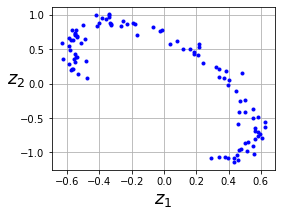

In [8]:
fig = plt.figure(figsize=(4,3))
plt.plot(encodings[:,0], encodings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

## Decoder 를 이용한 data 복원

- 학습된 decoder를 이용하여 data 복원

In [9]:
decodings = decoder.predict(encodings)

decodings.shape

4/4 [==============================] - 0s 1ms/step


(100, 3)

- 복원된 data 시각화

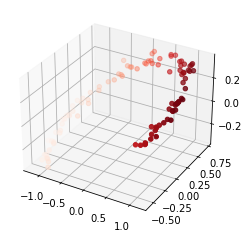

In [10]:
ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:, 0], decodings[:, 1], 
             decodings[:, 2], c=decodings[:, 0], cmap='Reds');